In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('/tmp/mnist.npz')

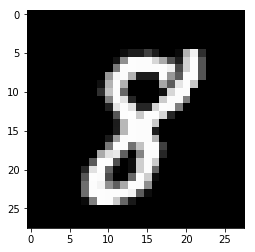

In [18]:
plt.imshow(x_train[97], cmap='gray')

In [21]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
#what does this -1 does here

In [22]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 
x_train /=255.0

In [23]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as k

k.clear_session()

model=Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
h=model.fit(x_train, y_train_cat,batch_size=128, epochs=2, verbose=1)

Train on 51480 samples, validate on 8520 samples
Epoch 1/2
51480/51480 [==============================] - 11s 205us/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0985
Epoch 2/2
51480/51480 [==============================] - 11s 217us/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0985


Text(0.5, 0, 'Epochs')

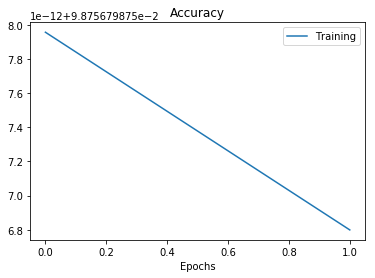

In [34]:
plt.plot(h.history['acc'])

# here we cannot use the commented line since havent given the validation split 
#since our data is comming in splitted form
#plt.plot(h.history['val_acc'])



plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [35]:
test_accuracy = model.evaluate(x_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 126us/step


0.098